In [1]:
import numpy as np
import pandas as pd
import glob
from astropy.table import Table
import matplotlib.pyplot as plt
import json 
import astropy

In [2]:
response_dict = {
    "#1" : 1,
    "#2" : 2,
    "#3" : 3,
    "#4" : 4,
    "#5" : 5,
    "No good match" : 0,
}

In [3]:
classification = Table.from_pandas(pd.read_csv(r'C:\Users\20xha\Documents\Caltech\Research\ZooniverseClassifications\zwicky-chemical-factory-classifications.csv'))

In [4]:
ccs_workflow = np.where(classification["workflow_name"] == "Core Collapse Supernovae")

In [5]:
classification[ccs_workflow][50]

classification_id,user_name,user_id,user_ip,workflow_id,workflow_name,workflow_version,created_at,gold_standard,expert,metadata,annotations,subject_data,subject_ids
int64,str34,float64,str20,int64,str25,float64,str23,float64,float64,str1216,str532,str485,int64
294870524,ElisabethB,123.0,f0b7035305b19bffddb5,16969,Core Collapse Supernovae,8.21,2020-12-15 17:44:42 UTC,--,--,"{""source"":""api"",""session"":""06c502ec1de2f48926d7dda9135525359515b594dbd954df80e23f50da52fcdd"",""viewport"":{""width"":1455,""height"":688},""started_at"":""2020-12-15T17:44:36.313Z"",""user_agent"":""Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.88 Safari/537.36"",""utc_offset"":""-3600"",""finished_at"":""2020-12-15T17:44:40.971Z"",""live_project"":true,""interventions"":{""opt_in"":true,""messageShown"":false},""user_language"":""en"",""user_group_ids"":[],""subject_dimensions"":[{""clientWidth"":935,""clientHeight"":525,""naturalWidth"":4800,""naturalHeight"":2700},null,null,null,null],""subject_selection_state"":{""retired"":false,""selected_at"":""2020-12-15T17:43:42.256Z"",""already_seen"":false,""selection_state"":""normal"",""finished_workflow"":false,""user_has_finished_workflow"":false},""workflow_translation_id"":""39739""}","[{""task"":""T0"",""task_label"":""Which spectrum is the best match?"",""value"":""No good match""}]","{""53626571"":{""retired"":null,""z_snid"":0.024,""!ZTF_Name"":""ZTF19aamljom"",""z_snid_err"":0.005,""!ZTF_Version"":""ZTF19aamljom_20190419_P60_v1""}}",53626571


In [6]:
subject_ids_unique = np.unique(classification[ccs_workflow]["subject_ids"])

In [7]:
right_workflow = classification[ccs_workflow]

In [8]:
data_np = np.load(r'C:\Users\20xha\Documents\Caltech\Research\ZooniverseClassifications\zwicky-chemical-factory-classifications.npy', allow_pickle = True)

In [9]:
len(data_np[:,1][0])

1

In [10]:
data_array = []
for i in data_np:
    if(len(i[1]) > 10):
        data_array.append([i[0], right_workflow[i[1]]])

In [11]:
size = []
for i in data_np[:,1]:
    size.append(len(i))

In [12]:
exec("dict =" + data_array[0][1]["annotations"][0])

In [13]:
json.loads(data_array[0][1]["annotations"][0])[0]

{'task': 'T0',
 'task_label': 'Which spectrum is the best match?',
 'value': '#1'}

In [14]:
dict[0]["value"].split("#")[-1]

'1'

In [15]:
data_array[0][1]["annotations"]

"[{""task"":""T0"",""task_label"":""Which spectrum is the best match?"",""value"":""#1""}]"
"[{""task"":""T0"",""task_label"":""Which spectrum is the best match?"",""value"":""#2""}]"
"[{""task"":""T0"",""task_label"":""Which spectrum is the best match?"",""value"":""No good match""}]"
"[{""task"":""T0"",""task_label"":""Which spectrum is the best match?"",""value"":""#1""}]"
"[{""task"":""T0"",""task_label"":""Which spectrum is the best match?"",""value"":""#1""}]"
"[{""task"":""T0"",""task_label"":""Which spectrum is the best match?"",""value"":""#1""}]"
"[{""task"":""T0"",""task_label"":""Which spectrum is the best match?"",""value"":""#1""}]"
"[{""task"":""T0"",""task_label"":""Which spectrum is the best match?"",""value"":""#1""}]"
"[{""task"":""T0"",""task_label"":""Which spectrum is the best match?"",""value"":""#1""}]"
"[{""task"":""T0"",""task_label"":""Which spectrum is the best match?"",""value"":""#2""}]"
"[{""task"":""T0"",""task_label"":""Which spectrum is the best match?"",""value"":""#1""}]"


In [16]:
json.loads(data_array[0][1][0]["subject_data"])['53623567']

{'retired': None,
 'z_snid': 0.0,
 '!ZTF_Name': 'ZTF17aaajnki',
 'z_snid_err': 0.002,
 '!ZTF_Version': 'ZTF17aaajnki_20180320_P60_v2'}

In [17]:
ResultsTable_Zooniverse = Table(
                    names=("ZTF_Name", "Version", "subject_ids", "NoMatch", "#1", "#2", "#3", "#4", "#5"
                    ),
                    meta={"name": "Spectrum Results after Zooniverse"},
                    dtype=("U64", "U64", "int32", "int32", "int32", "int32", "int32", "int32", "int32"
                          )
                    )
for line in data_array:
    row = []
    data = line[1]
    metadata = json.loads(data[0]["subject_data"])[str(line[0])]
    row.append(metadata["!ZTF_Name"])
    row.append(metadata["!ZTF_Version"] + ".ascii")
    row.append(line[0])
    responses = [0, 0, 0, 0, 0, 0]
    for i in data:
        value = json.loads(i["annotations"])[0]["value"]
        if(value is not None):
            index = response_dict[value]
            responses[index] = responses[index] + 1
    row.extend(responses)
    ResultsTable_Zooniverse.add_row(row)

In [ ]:
metadata = json.loads(data[0]["subject_data"])[str(line[0])]
value = json.loads(i["annotations"])[0]["value"]

In [18]:
np.sum(ResultsTable_Zooniverse["NoMatch"])

5109

In [19]:
np.sum(ResultsTable_Zooniverse["#1"])

6521

In [20]:
np.sum(ResultsTable_Zooniverse["#2"])

4389

In [21]:
np.sum(ResultsTable_Zooniverse["#3"])

4093

In [22]:
np.sum(ResultsTable_Zooniverse["#4"])

3720

In [23]:
np.sum(ResultsTable_Zooniverse["#5"])

3813

In [24]:
ResultsTable_Zooniverse.to_pandas().to_csv("FirstAnalysis.csv")

In [25]:
snidoutput = Table.from_pandas(pd.read_csv("SNID_2020_output.csv"))

In [26]:
joined_results = astropy.table.join(snidoutput, ResultsTable_Zooniverse)

In [27]:
ResultsTable_Zooniverse_Classes = Table(
                    names=("ZTF_Name", "Version", "subject_ids", 'Ia', 'Ia-norm', 'Ia-91T', 'Ia-91bg', 'Ia-csm', 'Ia-02cx', 'Ia-03fg',
                           'Ib', 'Ib-norm', 'IIb', 'Ibn', 'Ic', 'Ic-norm', 'Ic-BL', 'Ic-SLSN', 'II', 'II-norm', 'IIn',
                           'NotSN', 'AGN', 'Gal', 'LBV', 'M-star', 'QSO', 'C-star', 'TDE', "NoMatch", "rlap", "z"
                    ),
                    meta={"name": "Vote Types"},
                    dtype=("U64", "U64", "int32", "int32", "int32", "int32", "int32", "int32" , "int32", "int32", "int32", "int32", "int32", "int32",
                           "int32", "int32", "int32", "int32", "int32", "int32", "int32", "int32", "int32", "int32", "int32", "int32", "int32", "int32", "int32", "int32", "float32", "float32"
                          )
                    )

for i in range(len(joined_results)):
    line = joined_results[i]
    row = [line["ZTF_Name"], line["Version"], line["subject_ids"]]
    row.extend(np.zeros(28))
    row.append(line["NoMatch"])
    ResultsTable_Zooniverse_Classes.add_row(row)
    ResultsTable_Zooniverse_Classes[i][line["c_snid_1"]] += line["#1"]
    ResultsTable_Zooniverse_Classes[i][line["c_snid_2"]] += line["#2"]
    ResultsTable_Zooniverse_Classes[i][line["c_snid_3"]] += line["#3"]
    ResultsTable_Zooniverse_Classes[i][line["c_snid_4"]] += line["#4"]
    ResultsTable_Zooniverse_Classes[i][line["c_snid_5"]] += line["#5"]
    top_line = [line["c_snid_1"], line["c_snid_2"], line["c_snid_3"],line["c_snid_4"], line["c_snid_5"]]
    classes = np.unique(top_line)
    votes = ResultsTable_Zooniverse_Classes[i][classes.tolist()]
    vote_data = []
    for j in votes:
        vote_data.append(j)
    best = np.where(np.asarray(top_line) == classes[np.argmax(vote_data)])[0][0]
    ResultsTable_Zooniverse_Classes[i]["rlap"] = line["rlap_{}".format(best + 1)]
    ResultsTable_Zooniverse_Classes[i]["z"] = line["z_snid_{}".format(best + 1)]

In [28]:
len(joined_results)

2518

In [29]:
joined_results

Version,ZTF_Name,z_sntemplate,z_rlap,z_snid,z_snid_err,z_level,rank_1,sntemplate_1,rlap_1,c_snid_1,z_snid_1,z_snid_err_1,age_1,age_flag_1,rank_2,sntemplate_2,rlap_2,c_snid_2,z_snid_2,z_snid_err_2,age_2,age_flag_2,rank_3,sntemplate_3,rlap_3,c_snid_3,z_snid_3,z_snid_err_3,age_3,age_flag_3,rank_4,sntemplate_4,rlap_4,c_snid_4,z_snid_4,z_snid_err_4,age_4,age_flag_4,rank_5,sntemplate_5,rlap_5,c_snid_5,z_snid_5,z_snid_err_5,age_5,age_flag_5,subject_ids,NoMatch,#1,#2,#3,#4,#5
str64,str64,str12,float64,float64,float64,int64,int64,str12,float64,str7,float64,float64,float64,int64,int64,str12,float64,str7,float64,float64,float64,int64,int64,str12,float64,str7,float64,float64,float64,int64,int64,str12,float64,str7,float64,float64,float64,int64,int64,str12,float64,str7,float64,float64,float64,int64,int32,int32,int32,int32,int32,int32,int32
ZTF17aaajnki_20180320_P60_v2.ascii,ZTF17aaajnki,kcSB2,18.27,-0.0004,0.0015,1,1,kcSB2,18.27,Gal,-0.0004,0.0015,-99.9,2,2,kcSB1,17.68,Gal,-0.0003,0.0015,-99.9,2,3,PS1-10bzj,11.43,Ic-SLSN,-0.0001,0.0024,6.55,0,5,kcSB4,5.82,Gal,-0.0006,0.004,-99.9,2,8,sn07it,5.14,II-norm,0.0003,0.0051,191.0,0,53623567,1,9,2,0,0,0
ZTF17aaapufz_20190304_P200_v1.ascii,ZTF17aaapufz,kcSc,28.52,0.0025,0.0006,1,1,kcSc,28.52,Gal,0.0025,0.0006,-99.9,2,2,kcSB4,26.83,Gal,0.0022,0.0007,-99.9,2,3,kcSB5,22.66,Gal,0.0025,0.0008,-99.9,2,8,agn,14.22,AGN,0.0023,0.0014,-99.9,2,9,qso,12.11,QSO,0.0025,0.0016,-100.0,2,53623569,1,9,0,1,0,0
ZTF17aaaukqn_20180904_P60_v1.ascii,ZTF17aaaukqn,sn97ef,6.95,0.3262,0.0146,0,1,sn97ef,6.95,Ic-BL,0.3262,0.0146,-14.0,0,7,sn2003W,4.54,Ia-norm,0.4743,0.0108,28.0,0,10,sn2005cf,4.3,Ia-norm,0.4432,0.0134,-6.6,0,16,sn1999gp,4.12,Ia-91T,0.4702,0.0123,35.1,0,17,sn03du,4.11,Ia-norm,0.4409,0.0122,-5.0,0,53623570,4,7,0,0,0,0
ZTF17aaazdba_20190315_P60_v1.ascii,ZTF17aaazdba,sn2013dg,4.27,0.2648,0.0143,1,1,sn2013dg,4.27,Ic-SLSN,0.2648,0.0143,5.16,0,2,ASASSN-15lh,4.2,Ic-SLSN,0.2981,0.0191,20.28,0,3,sn96L,4.15,IIn,0.3161,0.0071,322.8,0,7,sn2007C,4.07,Ib-norm,0.4644,0.0127,13.8,0,9,sn05gj,3.76,Ia-csm,0.0529,0.0182,48.11,0,53623579,7,3,0,0,0,1
ZTF17aaazdba_20190424_P60_v1.ascii,ZTF17aaazdba,sn90N,7.32,0.9621,0.0085,0,1,sn90N,7.32,Ia-norm,0.9621,0.0085,-6.4,0,3,SSS120810-23,6.15,Ic-SLSN,0.7381,0.0144,38.63,0,4,sn2015bn,5.83,Ic-SLSN,0.4979,0.0072,5.84,0,5,sn2013dx,5.41,Ic-BL,0.5423,0.016,-3.2,0,6,sn2008ax,5.32,IIb,0.7182,0.0101,-13.0,0,53623588,2,0,1,7,1,0
ZTF17aaazdba_20190925_Keck1_v4.ascii,ZTF17aaazdba,ASASSN14li,12.26,0.0225,0.002,1,1,ASASSN14li,12.26,TDE,0.0225,0.002,136.0,1,2,sn1994I,7.1,Ic-norm,0.0431,0.0105,3.5,0,3,sn97ef,7.1,Ic-BL,0.0431,0.0134,13.8,0,4,sn1999by,6.99,Ia-91bg,0.0409,0.0093,4.0,0,13,sn2002ap,5.88,Ic-BL,0.0424,0.0137,11.6,0,53623594,0,11,0,0,0,0
ZTF17aaburzk_20180717_P60_v1.ascii,ZTF17aaburzk,sn87A,7.8,0.0234,0.0089,1,1,sn87A,7.8,II-norm,0.0234,0.0089,11.3,0,2,sn2003Y,7.76,Ia-91bg,0.0333,0.0094,-6.3,0,10,sn2006ep,6.69,Ib-norm,0.0228,0.0108,8.5,0,17,sn1995F,6.39,Ic-norm,0.0267,0.0111,1.9,1,21,sn2007ax,6.16,Ia-91bg,0.0302,0.0123,-1.9,0,53623599,7,0,1,1,0,2
ZTF18aaabltn_20190502_DCT_v1.ascii,ZTF18aaabltn,qso,22.9,0.045,0.0012,1,1,qso,22.9,QSO,0.045,0.0012,-100.0,2,2,agn,21.11,AGN,0.0449,0.0014,-99.9,2,3,sn06bc,13.66,II-norm,0.0444,0.0018,9.0,0,4,kcSB3,11.93,Gal,0.0457,0.0019,-99.9,2,5,kcSB5,10.74,Gal,0.045,0.0021,-99.9,2,53623603,0,1,7,1,1,1
ZTF18aaadtdc_20181106_P60_v1.ascii,ZTF18aaadtdc,agn,30.5,0.0359,0.0013,1,1,agn,30.5,AGN,0.0359,0.0013,-99.9,2,2,qso,23.31,QSO,0.0358,0.0015,-100.0,2,3,kcSB5,14.41,Gal,0.0359,0.0024,-99.9,2,4,kcSB3,12.83,Gal,0.0366,0.0026,-99.9,2,5,sn06bc,12.54,II-norm,0.0352,0.0027,9.0,0,53623604,0,10,0,0,0,0


In [30]:
ResultsTable_Zooniverse_Classes.to_pandas().to_csv("ClassTotals.csv")

In [31]:
final_rcf_table = Table.from_pandas(pd.read_hdf(r"C:\Users\20xha\Documents\Caltech\Research/final_rcf_table.h5"))

In [32]:
Joined_ZTF_2018 = astropy.table.join(ResultsTable_Zooniverse_Classes, final_rcf_table)

In [33]:
types = ['Ia', 'Ia-norm', 'Ia-91T', 'Ia-91bg', 'Ia-csm', 'Ia-02cx', 'Ia-03fg',
                           'Ib', 'Ib-norm', 'IIb', 'Ibn', 'Ic', 'Ic-norm', 'Ic-BL', 'Ic-SLSN', 'II', 'II-norm', 'IIn',
                           'NotSN', 'AGN', 'Gal', 'LBV', 'M-star', 'QSO', 'C-star', 'TDE', "NoMatch"]

In [34]:
cutoffs = [6,7,8,9,10,11]
rlap_cutoffs = [0, 5, 10, 15, 20]

In [35]:
Joined_ZTF_2018[0]

ZTF_Name,Version,subject_ids,Ia,Ia-norm,Ia-91T,Ia-91bg,Ia-csm,Ia-02cx,Ia-03fg,Ib,Ib-norm,IIb,Ibn,Ic,Ic-norm,Ic-BL,Ic-SLSN,II,II-norm,IIn,NotSN,AGN,Gal,LBV,M-star,QSO,C-star,TDE,NoMatch,rlap,z,TNS_Name,discovered_by,tns_internal_name,RA_sn,Dec_sn,sn_type,z_sn,g_jd_max,g_max,g_unc_max,r_jd_max,r_max,r_unc_max,ebv,host_name_PS1,RA_host_PS1,Dec_host_PS1,z_host,sep,projected_kpc,gKron_PS1,rKron_PS1,iKron_PS1,zKron_PS1,yKron_PS1,w1_host,w2_host,ebv_host
str64,str64,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,float32,float32,str9,str13,str29,float64,float64,str9,float64,float64,float64,float64,float64,float64,float64,float64,str21,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
ZTF18aabssth,ZTF18aabssth_20180309_P60_v1.ascii,53623619,0,0,0,0,0,0,0,0,0,7,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,8.07,0.0374,SN2018aex,ZTF,ZTF18aabssth,165.1891017637735,22.287497041839774,II,0.026000000000000002,2458494.0531481,20.44230842590332,0.1942138969898224,2458218.7148727,18.741601943969727,0.0452471598982811,0.01536,PSO J165.1878+22.2877,165.18778907,22.28771869,0.022914,4.444857426598462,2.0566548608097266,16.885400772094727,16.492399215698242,16.382200241088867,16.378400802612305,16.610000610351562,15.79401524178536,16.38349243564084,0.015369999999999997


In [36]:
tables = []
for cut in cutoffs:
    Classes = Table(
                    names=("ZTF_Name", "Version", "Real_c", "Zooniverse_c"
                    ),
                    meta={"name": "Spectrum Results after Zooniverse"},
                    dtype=("U64", "U64", "U64", "U64",
                          )
                    )
    for line in Joined_ZTF_2018:
        row = []
        row.append(line["ZTF_Name"])
        row.append(line["Version"])
        row.append(line["sn_type"])
        best = []
        best_num = []
        for i in types:
            if(line[i] >= cut):
                best.append(i)
                best_num.append(line[i])
        if(len(best) != 0):
            row.append(best[np.argmax(best_num)])
            Classes.add_row(row)
    tables.append([cut, Classes])

In [60]:
tables = []
for cut in rlap_cutoffs:
    Classes = Table(
                    names=("ZTF_Name", "Version", "Real_c", "Zooniverse_c"
                    ),
                    meta={"name": "Spectrum Results after Zooniverse"},
                    dtype=("U64", "U64", "U64", "U64",
                          )
                    )
    for line in Joined_ZTF_2018:
        row = []
        row.append(line["ZTF_Name"])
        row.append(line["Version"])
        row.append(line["sn_type"])
        best = []
        best_num = []
        for i in types:
            if(line[i] >= 9 and line["z"] < .2):
                if(line["rlap"] >= cut):
                    best.append(i)
                    best_num.append(line[i])
        if(len(best) != 0):
            row.append(best[np.argmax(best_num)])
            Classes.add_row(row)
    tables.append([cut, Classes])

In [61]:
negativeII = 0
positiveII = 0
for j in Joined_ZTF_2018:
    correct_1a = "II" in j["sn_type"]
    if(correct_1a):
        positiveII += 1
    if(not(correct_1a)):
        negativeII += 1

In [62]:
cutoff_confidence = [] 
for i in tables:
    truepositive = 0
    falsepositive = 0
    for j in i[1]:
        correct_1a = "II" in j["Real_c"]
        classified_1a = "II" in j["Zooniverse_c"]
        if(correct_1a == True and classified_1a == True):
            truepositive += 1
        if(correct_1a != True and classified_1a == True):
            falsepositive += 1
    cutoff_confidence.append([i[0],truepositive/(positiveII),falsepositive/(negativeII),len(i[1]), truepositive, falsepositive])
cutoff_confidence = np.asarray(cutoff_confidence)

In [63]:
cutoff_confidence

array([[0.00000000e+00, 1.71328671e-01, 1.73310225e-03, 2.52000000e+02,
        4.90000000e+01, 1.00000000e+00],
       [5.00000000e+00, 1.71328671e-01, 1.73310225e-03, 2.48000000e+02,
        4.90000000e+01, 1.00000000e+00],
       [1.00000000e+01, 1.18881119e-01, 1.73310225e-03, 1.95000000e+02,
        3.40000000e+01, 1.00000000e+00],
       [1.50000000e+01, 4.89510490e-02, 0.00000000e+00, 1.09000000e+02,
        1.40000000e+01, 0.00000000e+00],
       [2.00000000e+01, 6.99300699e-03, 0.00000000e+00, 4.40000000e+01,
        2.00000000e+00, 0.00000000e+00]])

Text(0, 0.5, 'True Positive Rate')

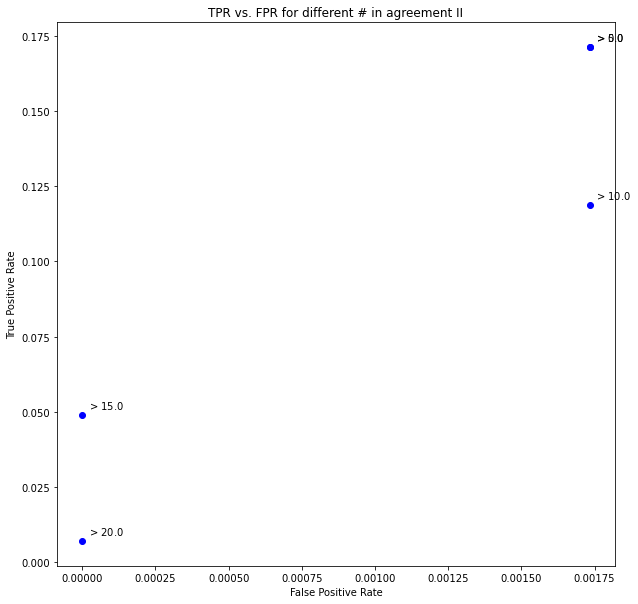

In [64]:
fig = plt.figure(figsize = (10,10))
plt.scatter(cutoff_confidence[:,2], cutoff_confidence[:,1], color = "blue")
for i in cutoff_confidence:
    plt.text(i[2]+.00002,i[1]+.002,"$>$"+str(i[0]))
plt.title("TPR vs. FPR for different # in agreement II")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

In [42]:
negativeI = 0
positiveI = 0
for j in Joined_ZTF_2018:
    correct_1a = "Ia" in j["sn_type"]
    if(correct_1a):
        positiveI += 1
    if(not(correct_1a)):
        negativeI += 1

In [43]:
cutoff_confidence_Ia = [] 
for i in tables:
    truepositive = 0
    falsepositive = 0
    for j in i[1]:
        correct_1a = "Ia" in j["Real_c"]
        classified_1a = "Ia" in j["Zooniverse_c"]
        if(correct_1a == True and classified_1a == True):
            truepositive += 1
        if(correct_1a != True and classified_1a == True):
            falsepositive += 1
    cutoff_confidence_Ia.append([i[0],truepositive/(positiveI),falsepositive/(negativeI),len(i[1]), truepositive, falsepositive])
cutoff_confidence_Ia = np.asarray(cutoff_confidence_Ia)

Text(0, 0.5, 'True Positive Rate')

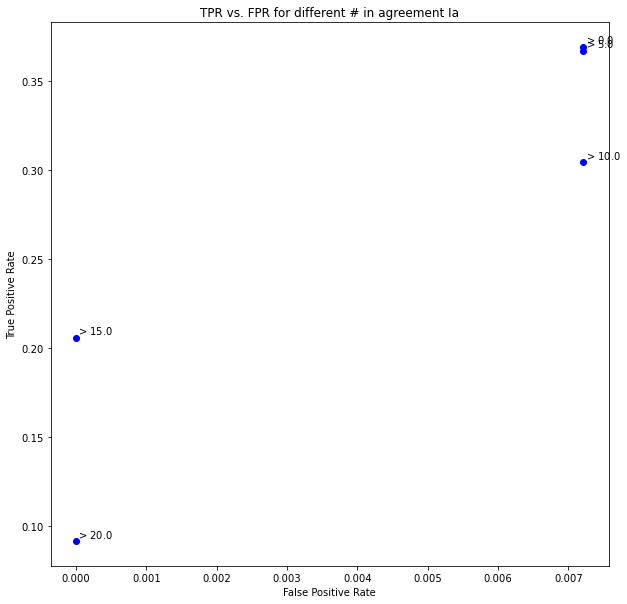

In [44]:
fig = plt.figure(figsize = (10,10))
plt.scatter(cutoff_confidence_Ia[:,2], cutoff_confidence_Ia[:,1], color = "blue")
for i in cutoff_confidence_Ia:
    plt.text(i[2]+.00002,i[1]+.002,"$>$"+str(i[0]))
plt.title("TPR vs. FPR for different # in agreement Ia")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

In [45]:
positiveI

447

In [46]:
positiveII

286

In [47]:
cutoff_confidence_Ia = [] 
for i in tables:
    truepositive = 0
    falsepositive = 0
    for j in i[1]:
        correct_1a = "Ia" in j["Real_c"]
        classified_1a = "Ia" in j["Zooniverse_c"]
        if(correct_1a == True and classified_1a == True):
            truepositive += 1
        if(correct_1a != True and classified_1a == True):
            print(j)
    break

  ZTF_Name                 Version                 Real_c Zooniverse_c
------------ ------------------------------------ ------- ------------
ZTF18abcfdzu ZTF18abcfdzu_20180807_Keck1_v1.ascii SLSN-II       Ia-csm
  ZTF_Name                 Version                Real_c Zooniverse_c
------------ ----------------------------------- ------- ------------
ZTF18abcfdzu ZTF18abcfdzu_20190704_P200_v1.ascii SLSN-II       Ia-csm
  ZTF_Name                 Version                Real_c Zooniverse_c
------------ ------------------------------------ ------ ------------
ZTF18abuatfp ZTF18abuatfp_20181204_Keck1_v1.ascii    IIn       Ia-csm


In [48]:
tables[-1][1]

ZTF_Name,Version,Real_c,Zooniverse_c
str64,str64,str64,str64
ZTF18aahfzea,ZTF18aahfzea_20180421_P60_v1.ascii,Ia,Ia-norm
ZTF18aainvic,ZTF18aainvic_20180622_TNG_v2.ascii,II,II-norm
ZTF18aajtlbf,ZTF18aajtlbf_20180420_P200_v1.ascii,Ia-91bg,Ia-91bg
ZTF18aakzliv,ZTF18aakzliv_20180516_P200_v1.ascii,Ia,Ia-norm
ZTF18aalcxig,ZTF18aalcxig_20180516_P200_v1.ascii,Ia,Ia-norm
ZTF18aaqgadq,ZTF18aaqgadq_20180516_P200_v1.ascii,Ia,Ia-norm
ZTF18aaqpjja,ZTF18aaqpjja_20180522_P200_v1.ascii,Ia,Ia-norm
ZTF18aauizcr,ZTF18aauizcr_20180519_P60_v2.ascii,Ia,Ia-norm
ZTF18aawdpnm,ZTF18aawdpnm_20180605_P60_v1.ascii,Ia,Ia-norm


In [49]:
np.sum(ResultsTable_Zooniverse_Classes["Ia-norm"] > 6)

475

In [50]:
positiveI

447

In [51]:
negativeIbIc = 0
positiveIbIc = 0
index = 0
indexes = []
for j in Joined_ZTF_2018:
    correct_1a = ("Ib" in j["sn_type"]) or ("Ic" in j["sn_type"]) 
    if(correct_1a):
        positiveIbIc += 1
        indexes.append(index)
    if(not(correct_1a)):
        negativeIbIc += 1
    index += 1

In [52]:
cutoff_confidence_IbIc = [] 
for i in tables:
    truepositiveIbIc = 0
    falsepositiveIbIc = 0
    JoinedResults = i[1]
    for j in JoinedResults:
        correct_1a = ("Ib" in j["Real_c"])
        classified_1a = ("Ib" in j["Zooniverse_c"])
        if(correct_1a == True and classified_1a == True):
            truepositiveIbIc += 1
        if(correct_1a != True and classified_1a == True):
            falsepositiveIbIc += 1
            
        correct_1a = ("Ic" in j["Real_c"])
        classified_1a = ("Ic" in j["Zooniverse_c"])
        if(correct_1a == True and classified_1a == True):
            truepositiveIbIc += 1
        if(correct_1a != True and classified_1a == True):
            falsepositiveIbIc += 1
        
    cutoff_confidence_IbIc.append([i[0],truepositiveIbIc/(positiveIbIc),falsepositiveIbIc/(negativeIbIc),len(JoinedResults), truepositiveIbIc, falsepositiveIbIc])
cutoff_confidence_IbIc = np.asarray(cutoff_confidence_IbIc)

Text(0, 0.5, 'True Positive Rate')

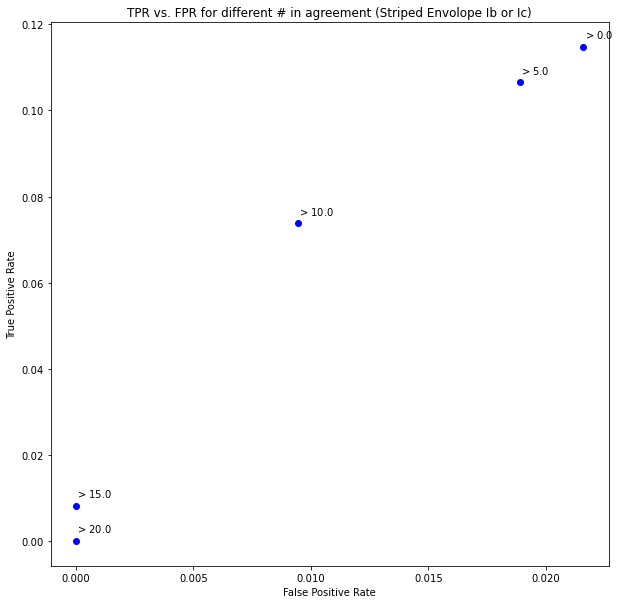

In [53]:
fig = plt.figure(figsize = (10,10))
plt.scatter(cutoff_confidence_IbIc[:,2], cutoff_confidence_IbIc[:,1], color = "blue")
for i in cutoff_confidence_IbIc:
    plt.text(i[2]+.00002,i[1]+.002,"$>$"+str(i[0]))
plt.title("TPR vs. FPR for different # in agreement (Striped Envolope Ib or Ic)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

In [54]:
for i in tables[-2][1]:
    if("Ib" in i["Real_c"]):
        print(i["Real_c"], i["Zooniverse_c"])

Ib Ib-norm
IIb Gal


In [55]:
for i in tables[-2][1]:
    if("Ib" in i["Zooniverse_c"]):
        print(i["Real_c"], i["Zooniverse_c"])

Ib Ib-norm


In [56]:
tables[0][1][tables[0][1]["Zooniverse_c"]=="NoMatch"]

ZTF_Name,Version,Real_c,Zooniverse_c
str64,str64,str64,str64


In [57]:
joined_results

Version,ZTF_Name,z_sntemplate,z_rlap,z_snid,z_snid_err,z_level,rank_1,sntemplate_1,rlap_1,c_snid_1,z_snid_1,z_snid_err_1,age_1,age_flag_1,rank_2,sntemplate_2,rlap_2,c_snid_2,z_snid_2,z_snid_err_2,age_2,age_flag_2,rank_3,sntemplate_3,rlap_3,c_snid_3,z_snid_3,z_snid_err_3,age_3,age_flag_3,rank_4,sntemplate_4,rlap_4,c_snid_4,z_snid_4,z_snid_err_4,age_4,age_flag_4,rank_5,sntemplate_5,rlap_5,c_snid_5,z_snid_5,z_snid_err_5,age_5,age_flag_5,subject_ids,NoMatch,#1,#2,#3,#4,#5
str64,str64,str12,float64,float64,float64,int64,int64,str12,float64,str7,float64,float64,float64,int64,int64,str12,float64,str7,float64,float64,float64,int64,int64,str12,float64,str7,float64,float64,float64,int64,int64,str12,float64,str7,float64,float64,float64,int64,int64,str12,float64,str7,float64,float64,float64,int64,int32,int32,int32,int32,int32,int32,int32
ZTF17aaajnki_20180320_P60_v2.ascii,ZTF17aaajnki,kcSB2,18.27,-0.0004,0.0015,1,1,kcSB2,18.27,Gal,-0.0004,0.0015,-99.9,2,2,kcSB1,17.68,Gal,-0.0003,0.0015,-99.9,2,3,PS1-10bzj,11.43,Ic-SLSN,-0.0001,0.0024,6.55,0,5,kcSB4,5.82,Gal,-0.0006,0.004,-99.9,2,8,sn07it,5.14,II-norm,0.0003,0.0051,191.0,0,53623567,1,9,2,0,0,0
ZTF17aaapufz_20190304_P200_v1.ascii,ZTF17aaapufz,kcSc,28.52,0.0025,0.0006,1,1,kcSc,28.52,Gal,0.0025,0.0006,-99.9,2,2,kcSB4,26.83,Gal,0.0022,0.0007,-99.9,2,3,kcSB5,22.66,Gal,0.0025,0.0008,-99.9,2,8,agn,14.22,AGN,0.0023,0.0014,-99.9,2,9,qso,12.11,QSO,0.0025,0.0016,-100.0,2,53623569,1,9,0,1,0,0
ZTF17aaaukqn_20180904_P60_v1.ascii,ZTF17aaaukqn,sn97ef,6.95,0.3262,0.0146,0,1,sn97ef,6.95,Ic-BL,0.3262,0.0146,-14.0,0,7,sn2003W,4.54,Ia-norm,0.4743,0.0108,28.0,0,10,sn2005cf,4.3,Ia-norm,0.4432,0.0134,-6.6,0,16,sn1999gp,4.12,Ia-91T,0.4702,0.0123,35.1,0,17,sn03du,4.11,Ia-norm,0.4409,0.0122,-5.0,0,53623570,4,7,0,0,0,0
ZTF17aaazdba_20190315_P60_v1.ascii,ZTF17aaazdba,sn2013dg,4.27,0.2648,0.0143,1,1,sn2013dg,4.27,Ic-SLSN,0.2648,0.0143,5.16,0,2,ASASSN-15lh,4.2,Ic-SLSN,0.2981,0.0191,20.28,0,3,sn96L,4.15,IIn,0.3161,0.0071,322.8,0,7,sn2007C,4.07,Ib-norm,0.4644,0.0127,13.8,0,9,sn05gj,3.76,Ia-csm,0.0529,0.0182,48.11,0,53623579,7,3,0,0,0,1
ZTF17aaazdba_20190424_P60_v1.ascii,ZTF17aaazdba,sn90N,7.32,0.9621,0.0085,0,1,sn90N,7.32,Ia-norm,0.9621,0.0085,-6.4,0,3,SSS120810-23,6.15,Ic-SLSN,0.7381,0.0144,38.63,0,4,sn2015bn,5.83,Ic-SLSN,0.4979,0.0072,5.84,0,5,sn2013dx,5.41,Ic-BL,0.5423,0.016,-3.2,0,6,sn2008ax,5.32,IIb,0.7182,0.0101,-13.0,0,53623588,2,0,1,7,1,0
ZTF17aaazdba_20190925_Keck1_v4.ascii,ZTF17aaazdba,ASASSN14li,12.26,0.0225,0.002,1,1,ASASSN14li,12.26,TDE,0.0225,0.002,136.0,1,2,sn1994I,7.1,Ic-norm,0.0431,0.0105,3.5,0,3,sn97ef,7.1,Ic-BL,0.0431,0.0134,13.8,0,4,sn1999by,6.99,Ia-91bg,0.0409,0.0093,4.0,0,13,sn2002ap,5.88,Ic-BL,0.0424,0.0137,11.6,0,53623594,0,11,0,0,0,0
ZTF17aaburzk_20180717_P60_v1.ascii,ZTF17aaburzk,sn87A,7.8,0.0234,0.0089,1,1,sn87A,7.8,II-norm,0.0234,0.0089,11.3,0,2,sn2003Y,7.76,Ia-91bg,0.0333,0.0094,-6.3,0,10,sn2006ep,6.69,Ib-norm,0.0228,0.0108,8.5,0,17,sn1995F,6.39,Ic-norm,0.0267,0.0111,1.9,1,21,sn2007ax,6.16,Ia-91bg,0.0302,0.0123,-1.9,0,53623599,7,0,1,1,0,2
ZTF18aaabltn_20190502_DCT_v1.ascii,ZTF18aaabltn,qso,22.9,0.045,0.0012,1,1,qso,22.9,QSO,0.045,0.0012,-100.0,2,2,agn,21.11,AGN,0.0449,0.0014,-99.9,2,3,sn06bc,13.66,II-norm,0.0444,0.0018,9.0,0,4,kcSB3,11.93,Gal,0.0457,0.0019,-99.9,2,5,kcSB5,10.74,Gal,0.045,0.0021,-99.9,2,53623603,0,1,7,1,1,1
ZTF18aaadtdc_20181106_P60_v1.ascii,ZTF18aaadtdc,agn,30.5,0.0359,0.0013,1,1,agn,30.5,AGN,0.0359,0.0013,-99.9,2,2,qso,23.31,QSO,0.0358,0.0015,-100.0,2,3,kcSB5,14.41,Gal,0.0359,0.0024,-99.9,2,4,kcSB3,12.83,Gal,0.0366,0.0026,-99.9,2,5,sn06bc,12.54,II-norm,0.0352,0.0027,9.0,0,53623604,0,10,0,0,0,0


Further Analysis
Weighing Users Plot number of classifications vs accuracy
Weighting Schemes
Isolate Users or subclasses
Cluster things that are wrong
PanStarrs Subtraction
Age vs Accuracy
Phase of the spectra vs Accuracyclassification[ccs_workflow]

In [156]:
wanted = classification[ccs_workflow]

In [157]:
users = np.unique(wanted["user_name"])

In [158]:
len(users)

1980

In [159]:
location_list = []
counter = 0
for i in users:
    counter += 1
    locations = np.where(wanted["user_name"] == i)
    location_list.append(np.asarray([i,locations[0],len(locations[0])]))
    if(counter % 100 == 0):
        print(counter)
location_list = np.asarray(location_list)

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900


(array([1.491e+03, 2.420e+02, 8.400e+01, 4.700e+01, 2.400e+01, 1.600e+01,
        1.400e+01, 7.000e+00, 1.000e+01, 8.000e+00, 5.000e+00, 6.000e+00,
        2.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00,
        2.000e+00, 2.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00, 2.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

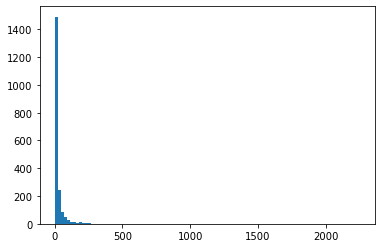

In [160]:
plt.hist(location_list[:, 2], bins = 100)

In [161]:
super_users = location_list[np.where(location_list[:,2] > 250)]

In [162]:
np.unique(location_list[:,2])

array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
       54, 55, 56, 57, 58, 60, 61, 62, 63, 64, 65, 66, 67, 69, 70, 71, 72,
       73, 74, 75, 76, 77, 78, 80, 82, 83, 84, 86, 87, 88, 89, 90, 91, 93,
       96, 98, 99, 100, 101, 102, 104, 106, 107, 110, 111, 112, 113, 114,
       115, 116, 117, 118, 119, 121, 122, 123, 128, 129, 131, 133, 134,
       135, 141, 142, 143, 145, 146, 147, 149, 150, 153, 156, 157, 158,
       159, 161, 167, 171, 177, 180, 183, 186, 187, 193, 201, 202, 203,
       206, 207, 212, 215, 220, 223, 233, 238, 244, 246, 249, 254, 256,
       264, 265, 268, 275, 300, 363, 384, 424, 427, 440, 442, 488, 514,
       546, 566, 591, 595, 628, 742, 845, 940, 972, 1093, 1150, 1252,
       1386, 1630, 2249], dtype=object)

In [163]:
results = []
for amount_done in np.unique(location_list[:,2]):
    right = 0
    total = 0
    for line in location_list[np.where(location_list[:,2] == amount_done)]:
        these_classes = classification[ccs_workflow][line[1]]
        for i in these_classes:
            subject_data = json.loads(i["subject_data"])
            annotations = json.loads(i["annotations"])
            value = annotations[0]["value"]
            ztf_name = subject_data[str(i["subject_ids"])]["!ZTF_Name"]
            ztf_version = subject_data[str(i["subject_ids"])]["!ZTF_Version"]
            type_location = np.where(final_rcf_table["ZTF_Name"] == ztf_name)[0]
            if(len(type_location) > 0 and value != None):
                type_location = type_location[0]
                snid_location = np.where(snidoutput["Version"] == ztf_version+".ascii")[0][0]
                response_number = response_dict[value]
                if(response_number != 0):
                    snid_class = snidoutput[snid_location]["c_snid_{}".format(response_number)]
                    actual_class = final_rcf_table[type_location]["sn_type"]
                    if(actual_class == snid_class):
                        right += 1
                    elif(actual_class in snid_class):
                        right += 1
                    elif("Ia" in actual_class and "Ia" in snid_class):
                        right += 1
                    elif("II" in actual_class and "II" in snid_class):
                        right += 1
                    elif("Ib" in actual_class and "Ib" in snid_class):
                        right += 1
                    elif("Ic" in actual_class and "Ic" in snid_class):
                        right += 1
                    total += 1
    results.append([amount_done, right, total, right/total])

In [165]:
results = np.asarray(results)

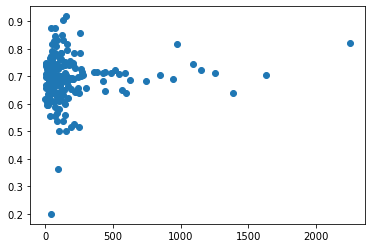

In [167]:
plt.scatter(results[:,0], results[:,3])

In [143]:
snidoutput[0]["c_snid_{}".format(1)]

'II-norm'

In [136]:
np.where(final_rcf_table["ZTF_Name"] == "ZTF18aabssth")[0]

array([0], dtype=int64)

In [147]:
np.unique(final_rcf_table["sn_type"])

II
II-87A
IIb
IIn
Ia
Ia-02cx
Ia-91T
Ia-91bg
Ia-SC
Ia-csm
Ib


In [148]:
np.unique(snidoutput["c_snid_1"])

AGN
C-star
Gal
II-norm
IIb
IIn
Ia-02cx
Ia-03fg
Ia-91T
Ia-91bg
Ia-csm


In [130]:
ztf_version+"ascii"

'ZTF19adcbnty_20200218_Keck1_v1ascii'

In [ ]:
tables_age = []
for cut in rlap_cutoffs:
    Classes = Table(
                    names=("ZTF_Name", "Version", "Real_c", "Zooniverse_c"
                    ),
                    meta={"name": "Spectrum Results after Zooniverse"},
                    dtype=("U64", "U64", "U64", "U64",
                          )
                    )
    for line in Joined_ZTF_2018:
        row = []
        row.append(line["ZTF_Name"])
        row.append(line["Version"])
        row.append(line["sn_type"])
        best = []
        best_num = []
        for i in types:
            if(line[i] >= 9):
                if(line["rlap"] >= cut):
                    best.append(i)
                    best_num.append(line[i])
        if(len(best) != 0):
            row.append(best[np.argmax(best_num)])
            Classes.add_row(row)
    tables_age.append([cut, Classes])